In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
import xgboost as xgb

In [2]:
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)
df_y.columns = ['HOUSING PRICE']
pd.concat([df_x, df_y], axis=1).to_csv('Boston.csv', sep = ',', index = False)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

1. learning_rate: step size shrinkage used to prevent overfitting.
2. max_depth: determines how deeply each tree is allowed to grow during any boosting round.
3. subsample: percentage of samples used per tree. Low value can lead to underfitting.
4. colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
5. n_estimators: number of trees you want to build.
6. objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification      problems with only decision, binary:logistic for classification problems with probability.
7. gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
8. alpha: L1 regularization on leaf weights. A large value leads to more regularization.
9. lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [5]:
# XGBoost in action...
params = {'n_estimators': 500, "objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 4, 'alpha': 1}
xg_reg = xgb.XGBRegressor(**params)

xg_reg.fit(x_train,y_train)
y_predicted = xg_reg.predict(x_test)

[00:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [6]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
print('R2 sq:', xg_reg.score(x_train,y_train))

Mean squared error: 13.03
Test Variance score: 0.86
R2 sq: 0.9675310172265559


In [7]:
# Gradient boosting in action...
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_train, y_train)
y_predicted_2 = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted_2))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted_2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Mean squared error: 13.86
Test Variance score: 0.85


[00:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


ImportError: You must install graphviz to plot tree

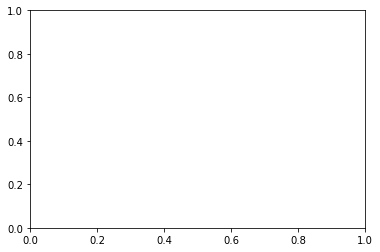

In [8]:
#XGBoost Visualizations
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01, 'max_depth': 4, 'alpha': 1}
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

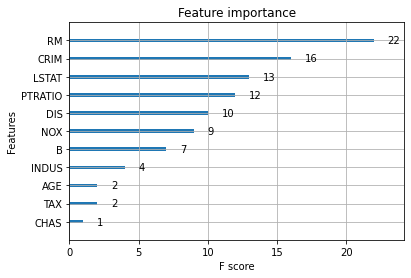

In [9]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - percentage lower status of the population